In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
INTERVAL_START = 0.0
INTERVAL_END = 1.0

In [3]:
class rbf_network_with_som:
    def __init__(self):
        self.centers = None

    def fit(self, patterns, center_count, cl_epochs=100, centers_learning_rate=0.2):
        neighbourhood = 7
        self.init_centers(center_count, patterns.shape[1])
        for i in range(cl_epochs):
            shuffled_idxs = np.random.permutation(patterns.shape[0])
            for idx in shuffled_idxs:
                curr_pattern = patterns[idx]
                
                winning_ind_raveled = np.argmin(np.linalg.norm(self.centers-curr_pattern, axis=2))
                winning_ind = np.unravel_index(winning_ind_raveled, (10, 10))
                
                #manhattan distance < neighbourhood
                winning_indices = []
                for x in range(-neighbourhood, neighbourhood+1):
                    for y in range(-neighbourhood, neighbourhood+1):
                        if(np.abs(x) + np.abs(y) > neighbourhood):
                            continue
                        if winning_ind[0] + x < 0 or winning_ind[0] + x > 9:
                            continue
                        if winning_ind[1] + y < 0 or winning_ind[1] + y > 9:
                            continue
                        winning_indices.append([winning_ind[0] + x, winning_ind[1] + y]) 
                #print(winning_ind)
                
                #This one can be commented i.e. useless
                winning_indices = np.reshape(np.array(winning_indices), (len(winning_indices), 2)) 
                #print(winning_indices)
                #print(winning_ind, winning_indices)
                for indx, indy in winning_indices:
                    self.centers[indx, indy] += centers_learning_rate * (curr_pattern - self.centers[indx, indy])
            if i < 20:
                neighbourhood = 7
            elif i < 45:
                neighbourhood = 4
            elif i < 70:
                neighbourhood = 2
            else:
                neighbourhood = 1

    def order(self, patterns):
        closest_centers = []
        for idx, curr_pattern in enumerate(patterns):
            winning_ind_raveled = np.argmin(np.linalg.norm(self.centers-curr_pattern, axis=2))

            winning_ind = np.unravel_index(winning_ind_raveled, (10, 10))
            closest_centers.append(winning_ind)
        # ordering dictionary based on keys
        return np.array(closest_centers)

    def init_centers(self, center_count, pattern_dims):
        self.centers = np.random.uniform(low=INTERVAL_START, high=INTERVAL_END,
                                         size=(center_count, center_count, pattern_dims))

In [11]:
votes_data = np.genfromtxt('votes.dat', delimiter=',')
votes_data = np.reshape(votes_data, (349, 31))

party_data = np.genfromtxt('mpparty.dat', dtype='float', skip_header=3) # skip 3 lines
gender_data = np.genfromtxt('mpsex.dat', dtype='float', skip_header=2)  # skip 2 lines
district_data = np.genfromtxt('mpdistrict.dat', dtype='int')

[0.  1.  0.  ... 0.  0.5 0. ]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 0.

# Clustering based on party

In [5]:
rbf_nn_cl = rbf_network_with_som()
rbf_nn_cl.fit(votes_data, center_count=10)
politician_grid = rbf_nn_cl.order(votes_data)
print(politician_grid)

[[1 7]
 [2 0]
 [2 8]
 [1 7]
 [8 6]
 [2 8]
 [6 1]
 [9 5]
 [7 3]
 [2 0]
 [0 3]
 [8 6]
 [7 7]
 [1 7]
 [7 0]
 [0 2]
 [7 0]
 [2 0]
 [8 6]
 [5 2]
 [8 6]
 [1 7]
 [7 5]
 [2 5]
 [8 6]
 [2 3]
 [8 6]
 [2 3]
 [9 3]
 [5 5]
 [2 3]
 [5 9]
 [7 0]
 [8 6]
 [3 4]
 [1 7]
 [3 4]
 [1 7]
 [4 6]
 [5 2]
 [8 6]
 [8 6]
 [8 6]
 [8 6]
 [6 6]
 [8 6]
 [1 9]
 [0 2]
 [1 7]
 [8 6]
 [6 4]
 [2 8]
 [5 0]
 [7 3]
 [4 8]
 [8 6]
 [1 7]
 [2 0]
 [2 0]
 [7 0]
 [1 1]
 [2 0]
 [4 6]
 [2 5]
 [7 3]
 [2 0]
 [3 2]
 [8 6]
 [0 6]
 [6 1]
 [1 1]
 [8 6]
 [1 7]
 [8 6]
 [8 6]
 [1 4]
 [5 9]
 [8 6]
 [2 3]
 [2 0]
 [1 7]
 [9 9]
 [8 6]
 [8 6]
 [8 4]
 [0 2]
 [8 6]
 [7 3]
 [9 0]
 [4 1]
 [1 1]
 [1 9]
 [8 6]
 [7 0]
 [8 6]
 [8 6]
 [7 3]
 [3 4]
 [1 1]
 [1 9]
 [8 6]
 [0 2]
 [1 7]
 [2 0]
 [8 6]
 [8 6]
 [7 9]
 [3 1]
 [1 9]
 [1 4]
 [4 3]
 [8 6]
 [8 6]
 [4 8]
 [8 6]
 [1 1]
 [6 4]
 [3 4]
 [8 6]
 [1 9]
 [2 0]
 [1 7]
 [1 1]
 [5 7]
 [8 6]
 [5 9]
 [0 2]
 [2 0]
 [1 1]
 [0 3]
 [7 9]
 [1 7]
 [6 1]
 [7 7]
 [9 7]
 [8 6]
 [2 0]
 [8 6]
 [8 6]
 [8 6]
 [8 6]
 [2 5]
 [0 2]

In [6]:
party_names = ['No party', 'Moderate', 'Liberals', 'Social Democratic', 'Left Party', 'Green Party', 'Christian Democrats', 'Center Party']

plot_positions = list(range(241, 249))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:olive', 'tab:cyan']

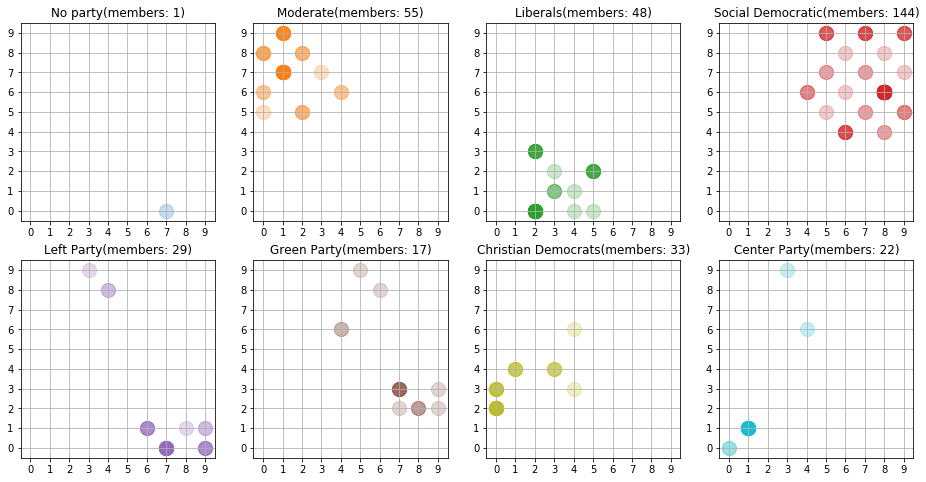

In [10]:
plt.rcParams['figure.figsize'] = [16, 8]

for i in range(int(min(party_data)), int(max(party_data))+1):
    party_indices = party_data == i
    party_politicians = politician_grid[party_indices]
    
    plt.subplot(plot_positions[i])
    plt.scatter(party_politicians[:, 0], party_politicians[:, 1], c=colors[i], s=200, alpha=0.25)
    plt.title(party_names[i] + "(members: " + str(len(party_politicians)) + ")")
    plt.xlim(-0.5, 9.5)
    plt.xticks(list(range(0, 10)))
    plt.ylim(-0.5, 9.5)
    plt.yticks(list(range(0, 10)))
    plt.grid()

plt.show()

The person without a party is closest to the leftists.
The moderates are far from the liberals.
The center party and the cristian democrats are close.

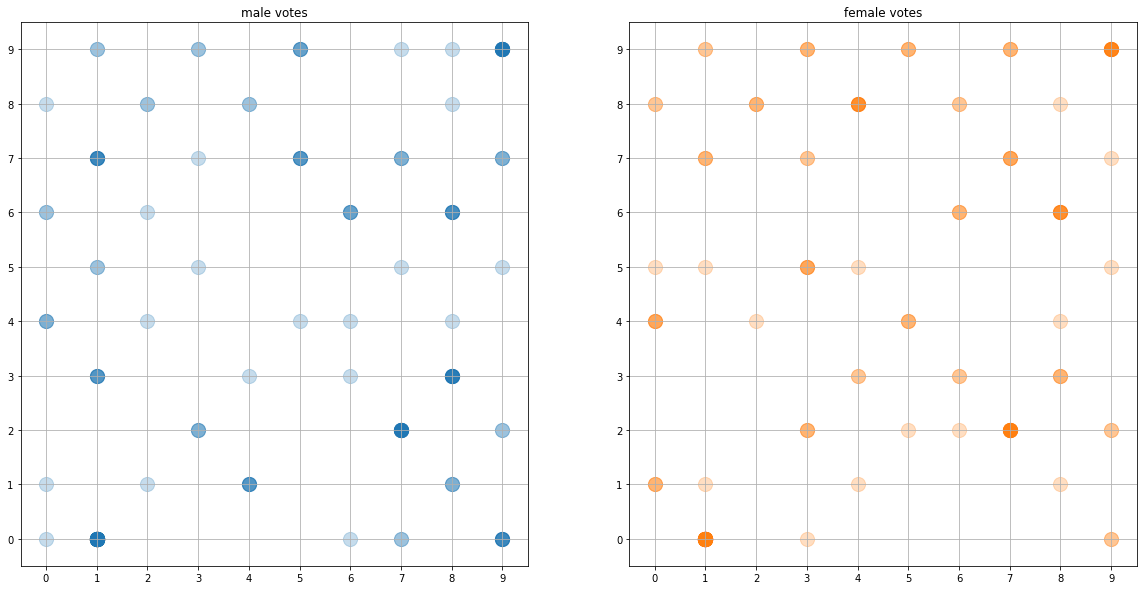

In [347]:
plt.rcParams['figure.figsize'] = [20, 10]
for i in range(2):
    gender_indices = gender_data == i
    g_politicians = politician_grid[gender_indices]
    
    plt.subplot(121 if i==0 else 122)
    plt.scatter(g_politicians[:, 0], g_politicians[:, 1], c=colors[i], s=200, alpha=0.25)
    plt.title("male votes" if i == 0 else "female votes")
    plt.xlim(-0.5, 9.5)
    plt.xticks(list(range(0, 10)))
    plt.ylim(-0.5, 9.5)
    plt.yticks(list(range(0, 10)))
    plt.grid()

plt.show()

There is no corelation in the gender and the votes.

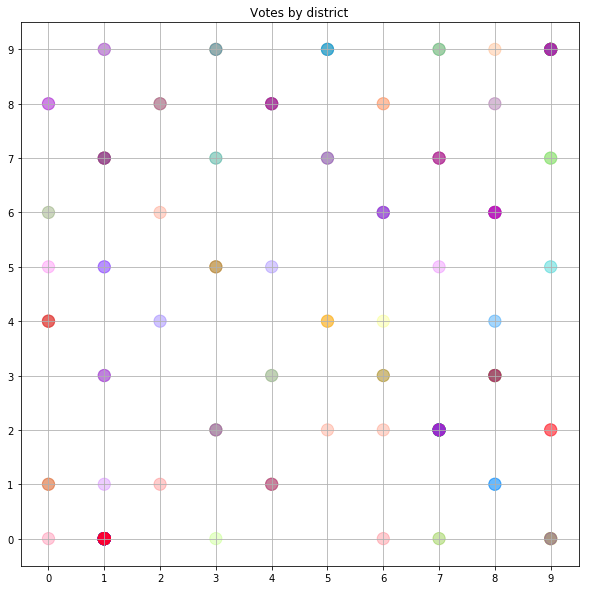

In [358]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.title("Votes by district")
plt.scatter(politician_grid[:, 0], politician_grid[:, 1], c=district_data, cmap='hsv',s=150, alpha=0.2)
plt.xlim(-0.5, 9.5)
plt.xticks(list(range(0, 10)))
plt.ylim(-0.5, 9.5)
plt.yticks(list(range(0, 10)))
plt.grid()